# Importing Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Displaying all columns

In [163]:
pd.options.display.max_columns = None

# Dataset Overview

In [164]:
rain = pd.read_csv('./data/rain_data_aus.csv')

In [165]:
rain.shape

(142193, 23)

In [166]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [167]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
date                142193 non-null object
location            142193 non-null object
mintemp             141556 non-null float64
maxtemp             141871 non-null float64
rainfall            140787 non-null float64
evaporation         81350 non-null float64
sunshine            74377 non-null float64
humidity9am         140419 non-null float64
humidity3pm         138583 non-null float64
pressure9am         128179 non-null float64
pressure3pm         128212 non-null float64
cloud9am            88536 non-null float64
cloud3pm            85099 non-null float64
temp9am             141289 non-null float64
temp3pm             139467 non-null float64
raintoday           140787 non-null object
amountOfRain        142193 non-null float64
raintomorrow        142193 non-null object
temp                141871 non-null float64
humidity            138583 non-null float64
precipitation3pm 

There are 4 object columns: 

In [168]:
rain.select_dtypes(include='object').columns

Index(['date', 'location', 'raintoday', 'raintomorrow'], dtype='object')

Looking for missing values

In [169]:
rain.isnull().sum()

date                    0
location                0
mintemp               637
maxtemp               322
rainfall             1406
evaporation         60843
sunshine            67816
humidity9am          1774
humidity3pm          3610
pressure9am         14014
pressure3pm         13981
cloud9am            53657
cloud3pm            57094
temp9am               904
temp3pm              2726
raintoday            1406
amountOfRain            0
raintomorrow            0
temp                  322
humidity             3610
precipitation3pm        0
precipitation9am        0
modelo_vigente          0
dtype: int64

# Simple Baseline

Then we decided to do a simple baseline so we can run the logistic regression

## Treating missing values

Let's drop the columns with high missing values. We decided to drop the columns that have more than 1/3 of missing values

In [170]:
nan = rain.isnull().sum()
cols_to_drop = []

for i, value in enumerate(nan.values):
    if value > rain.shape[0]/3:
        cols_to_drop.append(nan.index[i])
        
cols_to_drop

['evaporation', 'sunshine', 'cloud9am', 'cloud3pm']

In [171]:
rain = rain.drop(cols_to_drop, axis=1)

In [172]:
rain.shape

(142193, 19)

In [173]:
rain.head()

,date,location,mintemp,maxtemp,rainfall,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [174]:
######### SELECT KBEST!

We also decided to drop 'pressure9am' and 'pressure3pm' columns ##WHY??

In [175]:
rain = rain.drop(['pressure9am','pressure3pm'], axis=1)

Now let's drop the rows that contain missing values

In [181]:
rain = rain.dropna()

In [182]:
rain.shape

(136489, 17)

Let's check if there are still any missing values

In [183]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136489 entries, 0 to 142192
Data columns (total 17 columns):
date                136489 non-null object
location            136489 non-null object
mintemp             136489 non-null float64
maxtemp             136489 non-null float64
rainfall            136489 non-null float64
humidity9am         136489 non-null float64
humidity3pm         136489 non-null float64
temp9am             136489 non-null float64
temp3pm             136489 non-null float64
raintoday           136489 non-null object
amountOfRain        136489 non-null float64
raintomorrow        136489 non-null object
temp                136489 non-null float64
humidity            136489 non-null float64
precipitation3pm    136489 non-null int64
precipitation9am    136489 non-null float64
modelo_vigente      136489 non-null float64
dtypes: float64(12), int64(1), object(4)
memory usage: 18.7+ MB


## Treating object columns

In [186]:
rain.select_dtypes(include='object').columns

Index(['date', 'location', 'raintoday', 'raintomorrow'], dtype='object')

Transform date into datetime values

In [187]:
rain['date'] = pd.to_datetime(rain.date)

Transform binary values of 'raintoday' and 'raintomorrow' into 0 and 1

In [189]:
rain['raintoday'] = rain.raintoday.apply(lambda x: 0 if x == 'No' else 1)

In [190]:
rain['raintomorrow'] = rain.raintomorrow.apply(lambda x: 0 if x == 'No' else 1)

In [192]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136489 entries, 0 to 142192
Data columns (total 17 columns):
date                136489 non-null datetime64[ns]
location            136489 non-null object
mintemp             136489 non-null float64
maxtemp             136489 non-null float64
rainfall            136489 non-null float64
humidity9am         136489 non-null float64
humidity3pm         136489 non-null float64
temp9am             136489 non-null float64
temp3pm             136489 non-null float64
raintoday           136489 non-null int64
amountOfRain        136489 non-null float64
raintomorrow        136489 non-null int64
temp                136489 non-null float64
humidity            136489 non-null float64
precipitation3pm    136489 non-null int64
precipitation9am    136489 non-null float64
modelo_vigente      136489 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(3), object(1)
memory usage: 18.7+ MB


Location columns:

In [194]:
rain['location'].value_counts()

Canberra            3328
Sydney              3308
Darwin              3188
Perth               3180
Hobart              3164
Brisbane            3120
Townsville          3026
Bendigo             3022
AliceSprings        3018
Adelaide            3012
PerthAirport        3008
Launceston          3006
MountGambier        3005
Mildura             3000
MelbourneAirport    2999
SydneyAirport       2997
Ballarat            2993
Albury              2981
Watsonia            2972
Sale                2967
Cairns              2963
Nuriootpa           2962
WaggaWagga          2955
Woomera             2950
Tuggeranong         2943
NorfolkIsland       2937
SalmonGums          2934
Wollongong          2926
Portland            2919
CoffsHarbour        2917
GoldCoast           2913
NorahHead           2875
Richmond            2863
Cobar               2860
Penrith             2844
BadgerysCreek       2842
Moree               2783
Dartmoor            2770
Walpole             2726
Witchcliffe         2678


We will deal with the 'location' column later

## Logistic Regression Model

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
model = LogisticRegression()

### Divide Train X Test

In [199]:
from sklearn.model_selection import train_test_split

In [200]:
y = rain['raintomorrow']

In [201]:
X = rain[['mintemp', 'maxtemp', 'rainfall', 'humidity9am',
       'humidity3pm', 'temp9am', 'temp3pm', 'amountOfRain',
       'temp', 'humidity', 'precipitation3pm', 'precipitation9am']]

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.5, 
                                                    random_state = 42)

### Training Model

In [203]:
model.fit(X_train, y_train)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
model.predict(X_train)

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [205]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
model.predict_proba(X_test)

array([[9.99999972e-01, 2.75096159e-08],
       [9.99999869e-01, 1.30708571e-07],
       [9.99999639e-01, 3.60955260e-07],
       ...,
       [9.99999943e-01, 5.74898459e-08],
       [9.99999981e-01, 1.93205541e-08],
       [9.99999982e-01, 1.76678256e-08]])

In [207]:
model.score(X_test, y_test)

0.9954282365008426

In [208]:
model.score(X_train, y_train)

0.9956479690522244

The score is too high! What's happening? Let's explore:

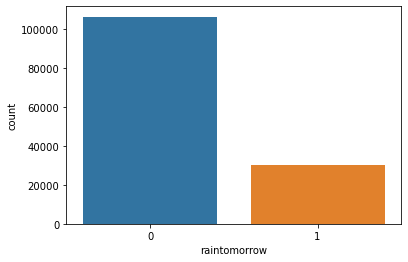

In [209]:
sns.countplot(rain['raintomorrow'])

### Confusing Matrix

In [210]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_score, recall_score, plot_roc_curve

In [211]:
confusion_matrix(y_test, model.predict(X_test))

array([[53168,   145],
       [  167, 14765]], dtype=int64)

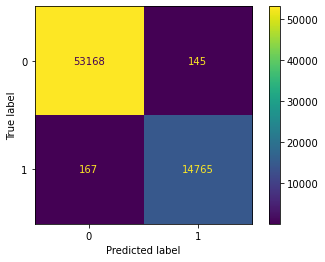

In [212]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

In [213]:
precision_score(y_test, model.predict(X_test))

0.9902749832327297

In [214]:
recall_score(y_test, model.predict(X_test))

0.9888159657112242

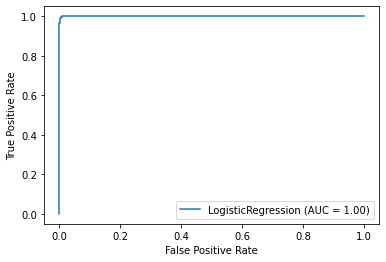

In [215]:
plot_roc_curve(model, X_test, y_test);

The AUC is also too high

### Investigating further

In [216]:
X_test.columns

Index(['mintemp', 'maxtemp', 'rainfall', 'humidity9am', 'humidity3pm',
       'temp9am', 'temp3pm', 'amountOfRain', 'temp', 'humidity',
       'precipitation3pm', 'precipitation9am'],
      dtype='object')

Importância de cada variável usada no modelo:

In [218]:
list(zip(list(X.columns), list(model.coef_[0])))

[('mintemp', 0.25214691595270233),
 ('maxtemp', -0.3295984256893837),
 ('rainfall', 0.0051981904122142195),
 ('humidity9am', -0.051841095319075554),
 ('humidity3pm', -0.059644315835828146),
 ('temp9am', -0.04387010333002787),
 ('temp3pm', -0.02522109338261389),
 ('amountOfRain', 13.899656747488631),
 ('temp', -0.0016475531725694459),
 ('humidity', 0.0012346453957433486),
 ('precipitation3pm', -0.16160028664691287),
 ('precipitation9am', -0.05656032023429881)]

The feature 'amountOfRain' explains basically by itself the target 'raintomorrow'. We are leaking the data about tomorrow. In "real life" we woudn't have the column "RainTomorrow" if we wanted to predict if it's going to rain tomorrow.

## Standardize Data

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler = StandardScaler()

In [227]:
X_std = scaler.fit_transform(X)

In [228]:
X_std = pd.DataFrame(X_std, columns=X.columns)

## Logistic Regression Model Without 'raintomorrow'

In [229]:
y = rain['raintomorrow']

In [230]:
X_2 = X_std[['humidity9am', 'humidity3pm', 'temp9am', 'rainfall',
             'temp3pm', 'precipitation3pm', 'precipitation9am']]

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [232]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [233]:
model.predict(X_train)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [234]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
model.predict_proba(X_test)

array([[0.93495853, 0.06504147],
       [0.77049493, 0.22950507],
       [0.98047341, 0.01952659],
       ...,
       [0.69695575, 0.30304425],
       [0.50074457, 0.49925543],
       [0.96810529, 0.03189471]])

In [236]:
model.score(X_test, y_test)

0.8344201040369258

In [237]:
model.score(X_train, y_train)

0.8328433662115009

Without the "raintomorrow" feature we got a more realistic score.

### Confusion Matrix

In [240]:
confusion_matrix(y_test, model.predict(X_test))

array([[20456,   839],
       [ 3681,  2322]], dtype=int64)

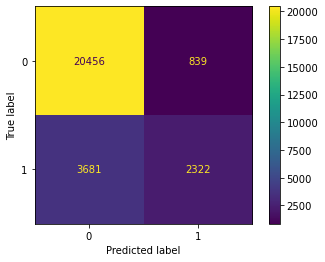

In [241]:
plot_confusion_matrix(model, X_test, y_test, values_format='.0f')

### Precision X Recall

Precision:

In [242]:
precision_score(y_test, model.predict(X_test))

0.7345776652957925

Recall:

In [243]:
recall_score(y_test, model.predict(X_test))

0.3868065967016492

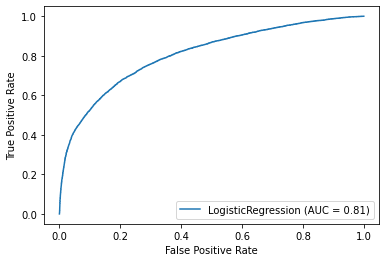

In [244]:
plot_roc_curve(model, X_test, y_test)

In [245]:
list(zip(list(X_2.columns), list(model.coef_[0])))

[('humidity9am', 0.022226016248869815),
 ('humidity3pm', 1.2155828731665657),
 ('temp9am', 0.3569956348517198),
 ('rainfall', 0.3227663896182044),
 ('temp3pm', -0.2665642766640514),
 ('precipitation3pm', 0.017384867001950185),
 ('precipitation9am', -0.018486962422454786)]